# What components of a job posting distinguish data scientists from other data jobs?

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score , roc_auc_score , \
confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import text 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import StandardScaler
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import re
import pickle

from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold ,StratifiedKFold

# 1. Loading and check data.

In [2]:
#import data. 
csv_file = "latest_scraped_jobs.csv"
df = pd.read_csv(csv_file)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 11 columns):
URL                 2016 non-null object
company             2016 non-null object
emp_type            2016 non-null object
industry            2016 non-null object
job_requirements    2016 non-null object
job_title           2016 non-null object
sal_lower           2016 non-null object
sal_type            2016 non-null object
sal_upper           2016 non-null object
seniority           2016 non-null object
skills              2016 non-null object
dtypes: object(11)
memory usage: 173.3+ KB


In [4]:
#check for null values
df.isna().sum()

URL                 0
company             0
emp_type            0
industry            0
job_requirements    0
job_title           0
sal_lower           0
sal_type            0
sal_upper           0
seniority           0
skills              0
dtype: int64

In [5]:
df.head()

,URL,company,emp_type,industry,job_requirements,job_title,sal_lower,sal_type,sal_upper,seniority,skills
0,https://www.mycareersfuture.sg/job/data-operat...,['REED BUSINESS INFORMATION PTE. LTD.'],"['Permanent, Full Time']","['Information Technology, Others']","['Roles & Responsibilities', ""ICIS is a divisi...",['Data Operations Analyst'],"['$4,000']",['Monthly'],"['$6,000']","['Executive, Junior Executive, Senior Executive']","['Access', 'Analysis', 'Analytics', 'Business ..."
1,https://www.mycareersfuture.sg/job/data-analys...,['BLACKBOX RESEARCH PTE LTD'],['Full Time'],['Others'],"['Roles & Responsibilities', 'As a Data Analys...",['Data Analyst (Data Science)'],"['$2,800']",['Monthly'],"['$3,600']",['Executive'],"['Analysis', 'Business Analysis', 'Clinical Da..."
2,https://www.mycareersfuture.sg/job/data-analys...,['SCIENTE INTERNATIONAL PTE. LTD.'],['Permanent'],['Information Technology'],"['Roles & Responsibilities', 'An exciting oppo...",['Data Analyst (HR) (JD#5114)'],"['$7,000']",['Monthly'],"['$12,000']",['Middle Management'],"['Access', 'Analysis', 'Analytics', 'Business ..."
3,https://www.mycareersfuture.sg/job/risk-financ...,['CARGILL TSF ASIA PTE. LTD.'],['Full Time'],['Banking and Finance'],"['Roles & Responsibilities', 'Position Purpose...",['Risk and Financial Data Analyst'],"['$5,500']",['Monthly'],"['$8,250']",['Professional'],"['Analysis', 'Banking', 'Credit Risk', 'Data A..."
4,https://www.mycareersfuture.sg/job/senior-data...,['JONES LANG LASALLE PROPERTY CONSULTANTS PTE ...,['Full Time'],['Real Estate / Property Management'],"['Roles & Responsibilities', 'Duties & respons...",['Senior Data Analyst'],"['$5,000']",['Monthly'],"['$7,000']",['Senior Executive'],"['Access', 'Analysis', 'Analytics', 'Business ..."


# 2. Remove punctuations from all columns

In [6]:
#define function for removing all square brackets and apostrophes.
def remove_brackets_apostrophe(raw_html):
     return str(raw_html).replace('[','').replace(']','').replace("'", '').replace('"', '')

In [7]:
#apply cleaning function
df = df.applymap(lambda x : remove_brackets_apostrophe(x))

In [8]:
df.isnull().sum()

URL                 0
company             0
emp_type            0
industry            0
job_requirements    0
job_title           0
sal_lower           0
sal_type            0
sal_upper           0
seniority           0
skills              0
dtype: int64

# 3. Explore skills column

- To filter out irrelevant skills

- To filter out potentially irrelevant job postings

Explore 'skills column' to find skills that are relevant to our question.

In [9]:
#get a list of unique skills.
df.skills = df.skills.map(lambda x: x.lower())
new_list = [j for i in df.skills for j in i.split(",")]
strip_list = [i.strip() for i in new_list]
unique_skills = set(strip_list)

In [10]:
#filter out the skills using keywords related to data science.
skills_list = []
for i in unique_skills:
    if "analytic" in i or "analysis" in i or "machine" in i or "data" in i\
    or "intelligence" in i or "statistic" in i or "solution" in i\
    or "image processing" in i or "mining" in i or "recognition" in i or "predictive" in i:
        skills_list.append(i)
related_skills = set(skills_list)

#visually inspect the shortlisted related skills
related_skills

{'analysis',
 'analytics',
 'artificial intelligence',
 'big data',
 'biostatistics',
 'business analysis',
 'business analytics',
 'business intelligence',
 'clinical data management',
 'competitive analysis',
 'competitive intelligence',
 'credit analysis',
 'data analysis',
 'data architecture',
 'data center',
 'data entry',
 'data governance',
 'data integration',
 'data management',
 'data migration',
 'data mining',
 'data modeling',
 'data warehouse architecture',
 'data warehousing',
 'database administration',
 'database design',
 'databases',
 'dispute resolution',
 'financial analysis',
 'finite element analysis',
 'google analytics',
 'image processing',
 'machine learning',
 'malware analysis',
 'market analysis',
 'master data management',
 'mining',
 'numerical analysis',
 'pattern recognition',
 'policy analysis',
 'predictive analytics',
 'predictive modeling',
 'pricing analysis',
 'quantitative analytics',
 'requirements analysis',
 'revenue analysis',
 'root cause 

In [11]:
#remove skills that does not seem relevant
related_skills.remove('data entry')
related_skills.remove('dispute resolution')

Remove all jobs that doesn't have any of the related skills.

To filter out all jobs that are potentially not relevant to our question.

In [12]:
#get index of all related job entries 
related_job=[]
for skill in related_skills:    
    for index, jobs in enumerate (df.skills):
        if skill in jobs:
            related_job.append(index)

#get unique entries only            
len(set(related_job))

#create new df with related jobs only 
df_related_jobs = df[df.index.isin(related_job)].copy(deep = True)
df_related_jobs.reset_index(inplace=True , drop = True)
df_related_jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1223 entries, 0 to 1222
Data columns (total 11 columns):
URL                 1223 non-null object
company             1223 non-null object
emp_type            1223 non-null object
industry            1223 non-null object
job_requirements    1223 non-null object
job_title           1223 non-null object
sal_lower           1223 non-null object
sal_type            1223 non-null object
sal_upper           1223 non-null object
seniority           1223 non-null object
skills              1223 non-null object
dtypes: object(11)
memory usage: 105.2+ KB


After removing jobs that are potentially not related.

There are 1223 jobs.

# 4. Inspect job employment type and job seniority type.

- Find unique list of job titles / job employment type
- Rank the job titles / job employment type
- Go to lowest denominator if multiple job seniority is present. (similarly for job employment type)

Job Employment Type

In [13]:
emp_type_list = [j for i in df_related_jobs.emp_type for j in i.split(",")]
emp_type_list = [i.strip() for i in emp_type_list]
set(emp_type_list)

{'Contract',
 'Flexi work',
 'Freelance',
 'Full Time',
 'Internship',
 'Part Time',
 'Permanent',
 'Temporary'}

Assume the ranks of employment type using general knowledge and information from careersfuture.

From lowest to highest

1:Temporary

2:Internship

3:Flexi work

4:Freelance

5:Part Time

6:Contract

7:Full time

8:Permanent

In [14]:
emp_type_dict = {'Temporary':"Temporary",'Internship':'Internship','Flexi work':'Flexiwork','Freelance':"Freelance",
                  'Part Time':'Parttime','Contract':'Contract','Full time':'Fulltime','Permanent':'Permanent'}

In [15]:
for index,emp_type in enumerate(df_related_jobs.emp_type):
    for item in emp_type_dict:
        if item in emp_type:
            df_related_jobs['emp_type'].iloc[index] = emp_type_dict[item]

In [16]:
df_related_jobs.emp_type.value_counts()

Permanent     510
Full Time     432
Contract      272
Temporary       4
Internship      3
Parttime        2
Name: emp_type, dtype: int64

Next we will clean the Job Seniority column.

In [17]:
seniority_list = [j for i in df_related_jobs.seniority for j in i.split(",")]
seniority_list = [i.strip() for i in seniority_list]
set(seniority_list)

{'Executive',
 'Fresh/entry level',
 'Junior Executive',
 'Manager',
 'Middle Management',
 'Non-executive',
 'Professional',
 'Senior Executive',
 'Senior Management'}

Rank the 9 main groups accordingly. Follow mycareersfuture.sg

Lowest to highest

1:Fresh/Entry Level 

2:Non-executive

3:Junior Executive

4:Executive

5:Senior Executive

6:Professional

7:Manager

8:Middle Management

9:Senior Management

In [18]:
seniority_dict = {'Fresh/entry level':"fresh",'Non-executive':'nonexec','Junior Executive':'jexec',
                  'Executive':'exec','Senior Executive':'srexec','Professional':'professional',
                 'Manager':'manager','Middle Management':'midman','Senior Management':'srman'}

In [19]:
for index,seniority in enumerate(df_related_jobs.seniority):
    for rank in seniority_dict:
        if rank in seniority:
            df_related_jobs['seniority'].iloc[index] = seniority_dict[rank]

In [20]:
df_related_jobs.seniority.value_counts()

professional    371
exec            314
srexec          150
manager         140
midman           96
nonexec          71
srman            43
fresh            38
Name: seniority, dtype: int64

# 5. Inspect industry column

In [21]:
industry_list = []

for i in df_related_jobs.industry:
    each_industry = i.split(",")
    for sub_industry in each_industry:
        industry_list.append(sub_industry.strip())
                
unique_industry_list = set(industry_list)

In [22]:
unique_industry_list

{'Accounting / Auditing / Taxation',
 'Admin / Secretarial',
 'Advertising / Media',
 'Architecture / Interior Design',
 'Banking and Finance',
 'Building and Construction',
 'Consulting',
 'Customer Service',
 'Design',
 'Education and Training',
 'Engineering',
 'Environment / Health',
 'Events / Promotions',
 'F&B',
 'General Management',
 'General Work',
 'Healthcare / Pharmaceutical',
 'Hospitality',
 'Human Resources',
 'Information Technology',
 'Insurance',
 'Legal',
 'Logistics / Supply Chain',
 'Manufacturing',
 'Marketing / Public Relations',
 'Medical / Therapy Services',
 'Others',
 'Professional Services',
 'Public / Civil Service',
 'Purchasing / Merchandising',
 'Real Estate / Property Management',
 'Risk Management',
 'Sales / Retail',
 'Sciences / Laboratory / R&D',
 'Social Services',
 'Telecommunications',
 'Travel / Tourism'}

In [23]:
#dummified industry to keep all the information. 
for i in unique_industry_list:
    series_name = 'industry_'+i
    df_related_jobs[series_name] = [1 if i in row else 0 for row in df_related_jobs.industry]

In [24]:
df_related_jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1223 entries, 0 to 1222
Data columns (total 48 columns):
URL                                           1223 non-null object
company                                       1223 non-null object
emp_type                                      1223 non-null object
industry                                      1223 non-null object
job_requirements                              1223 non-null object
job_title                                     1223 non-null object
sal_lower                                     1223 non-null object
sal_type                                      1223 non-null object
sal_upper                                     1223 non-null object
seniority                                     1223 non-null object
skills                                        1223 non-null object
industry_Public / Civil Service               1223 non-null int64
industry_Human Resources                      1223 non-null int64
industry_Architecture / 

In [25]:
df_related_jobs.loc[:, "industry_Insurance":].sum().sort_values()

industry_Hospitality              3
industry_Risk Management          5
industry_Design                   7
industry_Insurance               17
industry_Consulting              77
industry_Banking and Finance    132
dtype: int64

# 6. Inspect Skills Column

In [26]:
skill_list = []

for i in df_related_jobs.skills:
    split_skills = i.split(",")
    for skill in split_skills:
        skill_list.append(skill.strip())
                
unique_skill_list = set(skill_list)
len(unique_skill_list)

697

In [27]:
#dummified industry to keep all the information. 
for i in unique_skill_list:
    series_name = 'skill_'+i
    df_related_jobs[series_name] = [1 if i in row else 0 for row in df_related_jobs.skills]

# 7. Inspect Company Names

In [28]:
df_related_jobs.company.nunique()

499

Decided to drop company name, as i think there is too many unique values.

In [29]:
df_related_jobs.drop(columns = 'company' , inplace = True)

# 6. Inspect Salary Column (Target Column)

Before looking at the salary data, I have decided to drop salary upper.

Reason : 

I have decided to go to the lowest denominator for all jobs posting. Consistent with the job employment type and job seniority
    

In [30]:
df_related_jobs.drop(columns = "sal_upper" , inplace = True)

In [31]:
#remove '$' and ',' from salary columns
df_related_jobs['sal_lower'] = df_related_jobs['sal_lower'].map(lambda x : x.replace("$","").replace(",",""))

In [32]:
#change sal_lower to correct type : "float"
df_related_jobs.sal_lower = df_related_jobs.sal_lower.astype(float)

In [33]:
#standardise all salary type to only monthly. 
#Divides annual packages by 13(assuming Annual wage supplement is present)
df_related_jobs.loc[df_related_jobs['sal_type'] == "Annually" , 'sal_lower']= df_related_jobs.loc[df_related_jobs['sal_type'] == "Annually" , 'sal_lower']/13

In [34]:
#drop salary type column after standardising
df_related_jobs.drop(columns = "sal_type" , inplace = True)

In [35]:
#observe that there are some weird values.
df_related_jobs.describe()

,sal_lower,industry_Public / Civil Service,industry_Human Resources,industry_Architecture / Interior Design,industry_Accounting / Auditing / Taxation,industry_Information Technology,industry_Medical / Therapy Services,industry_Customer Service,industry_Healthcare / Pharmaceutical,industry_Legal,...,skill_pricing strategy,skill_bloomberg,skill_disaster recovery,skill_product development,skill_completions,skill_web analytics,skill_drilling,skill_interim management,skill_physics,skill_iso
count,1223.000000,1223.000000,1223.000000,1223.000000,1223.000000,1223.000000,1223.000000,1223.000000,1223.000000,1223.000000,...,1223.000000,1223.000000,1223.000000,1223.000000,1223.000000,1223.000000,1223.000000,1223.000000,1223.000000,1223.000000
mean,5310.593371,0.028618,0.008994,0.000818,0.039248,0.509403,0.000818,0.013083,0.008177,0.000818,...,0.002453,0.001635,0.082584,0.063778,0.000818,0.022895,0.001635,0.000818,0.003271,0.003271
std,2452.058122,0.166799,0.094449,0.028595,0.194263,0.500116,0.028595,0.113675,0.090091,0.028595,...,0.049487,0.040423,0.275365,0.244456,0.028595,0.149628,0.040423,0.028595,0.057119,0.057119
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5000.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6500.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,21153.846154,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
#decide to drop job with salary $1
df_related_jobs.drop(index = df_related_jobs.index[df_related_jobs['sal_lower'] == 1] , inplace = True)
df_related_jobs.reset_index(drop = True, inplace = True)

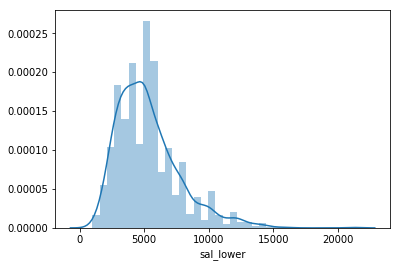

In [37]:
sns.distplot(df_related_jobs.sal_lower)

# 7. Dummify the rest of the columns

- emp_type
- seniority

In [38]:
df_related_jobs = pd.concat([df_related_jobs, pd.get_dummies(df_related_jobs[["emp_type","seniority"]])], axis=1)

In [39]:
len(df_related_jobs.columns)

756

# 8. Dropping all old columns that have already been dummified or feature engineered already.

In [40]:
df_related_jobs.columns

Index(['URL', 'emp_type', 'industry', 'job_requirements', 'job_title',
       'sal_lower', 'seniority', 'skills', 'industry_Public / Civil Service',
       'industry_Human Resources',
       ...
       'emp_type_Permanent', 'emp_type_Temporary', 'seniority_exec',
       'seniority_fresh', 'seniority_manager', 'seniority_midman',
       'seniority_nonexec', 'seniority_professional', 'seniority_srexec',
       'seniority_srman'],
      dtype='object', length=756)

In [41]:
df_related_jobs.drop(columns=['industry','URL','emp_type','seniority','skills'],inplace = True)

In [42]:
len(df_related_jobs.columns)

751

# 9. Text Preprocessing for job requirements. 

In [43]:
df_related_jobs.job_requirements.head()

0    Roles & Responsibilities, ICIS is a division o...
1    Roles & Responsibilities, As a Data Analyst, y...
2    Roles & Responsibilities, An exciting opportun...
3    Roles & Responsibilities, Position Purpose & S...
4    Roles & Responsibilities, Duties & responsibil...
Name: job_requirements, dtype: object

In [44]:
#some basic preprocessing to remove symbols 
df_related_jobs['job_requirements'] = df_related_jobs['job_requirements'].str.replace('[^\w\s]','')
df_related_jobs['job_requirements']

0       Roles  Responsibilities ICIS is a division of ...
1       Roles  Responsibilities As a Data Analyst you ...
2       Roles  Responsibilities An exciting opportunit...
3       Roles  Responsibilities Position Purpose  Summ...
4       Roles  Responsibilities Duties  responsibiliti...
5       Roles  Responsibilities Analyst profile with u...
6       Roles  Responsibilities As part of CICs rapid ...
7       Roles  Responsibilities     Understand analyse...
8       Roles  Responsibilities The main responsibilit...
9       Roles  Responsibilities  t Interpret data anal...
10      Roles  Responsibilities  t As a Senior Data En...
11      Roles  Responsibilities PropertyGuru Group is ...
12      Roles  Responsibilities We are currently looki...
13      Roles  Responsibilities Data Analyst at Travel...
14      Roles  Responsibilities You will be responsibl...
15      Roles  Responsibilities PropertyGuru Group is ...
16      Roles  Responsibilities As Senior Data Enginee...
17      Roles 

In [45]:
#does word count also impact the type of job post?
df_related_jobs['word_count'] = df_related_jobs['job_requirements'].apply(lambda x: len(str(x).split(" ")))
df_related_jobs[['job_requirements','word_count']]

,job_requirements,word_count
0,Roles Responsibilities ICIS is a division of ...,510
1,Roles Responsibilities As a Data Analyst you ...,349
2,Roles Responsibilities An exciting opportunit...,372
3,Roles Responsibilities Position Purpose Summ...,879
4,Roles Responsibilities Duties responsibiliti...,434
5,Roles Responsibilities Analyst profile with u...,150
6,Roles Responsibilities As part of CICs rapid ...,312
7,Roles Responsibilities Understand analyse...,246
8,Roles Responsibilities The main responsibilit...,445
9,Roles Responsibilities t Interpret data anal...,255


# 10. Prepare job_title as target label.

In [46]:
df_related_jobs.job_title = df_related_jobs.job_title.str.lower()

In [47]:
df_related_jobs.job_title = df_related_jobs.job_title.apply(lambda x :1 if 'data scientist' in x else '0')    

In [48]:
df_related_jobs.job_title.value_counts()

0    1138
1      84
Name: job_title, dtype: int64

# 11. Count vectorize job requirements

Since most of the key words are atleast bi-gram or tri-gram. My ngram_range will be 2,3.

In [52]:
stop_words = text.ENGLISH_STOP_WORDS.union(['roles','xa0','requirements','regret' ,'shortlisted',\
                                            'candidates', 'notified','working','position', 'opportunities'\
                                            , 'duties', 'looking' , 'seeking' , 'companies','description' , 'part'\
                                           'work','able','added','advantage','responsibilities','skills','ability','singapore'])
cvec_job_requirements =  CountVectorizer(ngram_range = (2,3) , min_df=0.05,max_df = 0.9,stop_words = stop_words, binary =True)

In [53]:
cvec_job_requirements.fit(df_related_jobs.job_requirements)

CountVectorizer(analyzer='word', binary=True, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.9, max_features=None, min_df=0.05,
        ngram_range=(2, 3), preprocessor=None,
        stop_words=frozenset({'whose', 'somewhere', 'thus', 'such', 'of', 'within', 'moreover', 'but', 'fire', 'have', 'found', 'otherwise', 'some', 'three', 'and', 'seeking', 'we', 'thereupon', 'may', 'de', 'ours', 'were', 'behind', 'is', 'do', 'up', 'able', 'already', 'shortlisted', 'will', 'also', 'show'...', 'duties', 'below', 'twelve', 'therefore', 'you', 'whereas', 'first', 'elsewhere', 're', 'forty'}),
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [54]:
job_requirements_vectors = pd.DataFrame(cvec_job_requirements.transform(df_related_jobs.job_requirements).todense(),
                           columns=cvec_job_requirements.get_feature_names())

In [55]:
job_requirements_vectors.sum().sort_values()

data management               65
product development           66
artificial intelligence       67
design development            67
business needs                68
business processes            70
minimum years experience      70
science related               71
knowledge experience          71
data mining                   72
verbal written                74
written communication         77
financial services            77
information technology        79
written verbal                82
good knowledge                84
business intelligence         85
handson experience            85
years relevant experience     87
excellent communication       87
track record                  88
deep learning                 88
related field                 91
work experience               93
data analysis                104
software development         106
good understanding           106
internal external            107
strong analytical            115
good communication           118
experience

In [56]:
df_for_modelling = pd.concat([df_related_jobs,job_requirements_vectors], axis=1).copy(deep = True)

In [57]:
df_for_modelling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1222 entries, 0 to 1221
Columns: 802 entries, job_requirements to years relevant experience
dtypes: float64(1), int64(785), object(2), uint8(14)
memory usage: 7.4+ MB


In [58]:
df_for_modelling.drop(columns = ['job_requirements'],inplace = True)

In [59]:
target = df_for_modelling['job_title']

In [60]:
predictors = df_for_modelling.drop(columns ='job_title')

In [61]:
target = target.astype(int)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.3, stratify=target, random_state=74)

# 12. Modelling 

Logistic regression model has been saved as : logreg_model_Q2.pkl

In [63]:
def grid_search_logistic(X_train, X_test, y_train, y_test):
    log_reg = LogisticRegression(solver ='liblinear' )
    # Create regularization penalty space
    penalty = ['l1', 'l2']
    # Create regularization hyperparameter space
    C = [0.001, 0.01, 0.1 , 1 , 10 , 100]
    # Create hyperparameter options
    hyperparameters = dict(C=C, penalty=penalty)
    clf = GridSearchCV(log_reg, hyperparameters, cv=5, scoring = 'roc_auc')
    
    best_log_reg = clf.fit(X_train, y_train)
    best_param = best_log_reg.best_params_
    best_score = best_log_reg.best_score_
    
    pred_score = best_log_reg.score(X_test,y_test)
    predictions = best_log_reg.predict(X_test)    
    y_pred_proba = best_log_reg.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    
    confusion = pd.crosstab(y_test,
                            predictions,
                            rownames=['Actual'],
                            colnames=['Predicted'],
                            margins=True)
    
    print("===Logistic Regression===")
    print('Best Param:', best_param)
    print('Best AUC Score from CV:',best_score)
    print("Prediction score:", pred_score)
    print("AUC Score:" , auc)
    
    print(classification_report(y_test,predictions))
    print(confusion)
    
    pkl_filename = "logreg_model_Q2.pkl"  
    with open(pkl_filename, 'wb') as file:  
        pickle.dump(best_log_reg, file)

Random Forest model has been saved as : "forest_model_Q2.pkl" 

In [77]:
def grid_search_forest(X_train, X_test, y_train, y_test):
    rfc=RandomForestClassifier(random_state=42)
    param_grid = { 
    'n_estimators': [200, 500, 1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' :['gini', 'entropy']
    }
    clf = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5,scoring = 'roc_auc')
       
    best_forest_model = clf.fit(X_train, y_train)
    best_param = best_forest_model.best_params_
    best_score = best_forest_model.best_score_

    pred_score = best_forest_model.score(X_test,y_test)
   
    coef = best_forest_model.best_estimator_.feature_importances_
    
    predictions = best_forest_model.predict(X_test)
    y_pred_proba = best_forest_model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    
    print("===Random Forest===")
    print('Best Params:', best_forest_model.best_params_)
    print('Best AUC Score from CV:',best_score)   

    print("Prediction score:", pred_score)
    print("AUC Score Test:" , auc)
    print(classification_report(y_test,predictions))

    
#     coefs = pd.DataFrame({'variable':predictors.columns,
#                             'coef':best_forest_model.best_estimator_.feature_importances_,
#                             'abs_coef':np.abs(best_forest_model.best_estimator_.feature_importances_)})
    
    pkl_filename = "forest_model_Q2.pkl"  
    with open(pkl_filename, 'wb') as file:  
        pickle.dump(best_forest_model, file)

In [66]:
grid_search_logistic(X_train, X_test, y_train, y_test)

===Logistic Regression===
Best Param: {'C': 1, 'penalty': 'l2'}
Best AUC Score from CV: 0.8905397277976723
Prediction score: 0.9387134502923976
AUC Score: 0.9387134502923976
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       342
           1       0.64      0.64      0.64        25

   micro avg       0.95      0.95      0.95       367
   macro avg       0.81      0.81      0.81       367
weighted avg       0.95      0.95      0.95       367

Predicted    0   1  All
Actual                 
0          333   9  342
1            9  16   25
All        342  25  367


In [67]:
grid_search_forest(X_train, X_test, y_train, y_test)

===Random Forest===
Best Params: {'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 1000}
Best AUC Score from CV: 0.9140080505485173
Prediction score: 0.9594736842105264
AUC Score Test: 0.9594736842105264
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       342
           1       0.75      0.36      0.49        25

   micro avg       0.95      0.95      0.95       367
   macro avg       0.85      0.68      0.73       367
weighted avg       0.94      0.95      0.94       367



Logistic Regression model performs better. Print coefficients.

In [68]:
pkl_filename = "logreg_model_Q2.pkl" 
with open(pkl_filename, 'rb') as file:  
    pickle_model_logreg = pickle.load(file)

In [69]:
coefs = pd.DataFrame({'variable':X_train.columns,
                            'coef':pickle_model_logreg.best_estimator_.coef_[0],
                            'abs_coef':np.abs(pickle_model_logreg.best_estimator_.coef_[0])})
coefs.sort_values(by = 'coef', ascending = False).head(15)

,abs_coef,coef,variable
777,1.881373,1.881373,machine learning
762,1.675398,1.675398,data science
781,1.078439,1.078439,product development
768,0.949163,0.949163,experience data
19,0.924179,0.924179,industry_Logistics / Supply Chain
793,0.901366,0.901366,work experience
742,0.800171,0.800171,seniority_fresh
763,0.731601,0.731601,deep learning
783,0.676066,0.676066,related field
784,0.620938,0.620938,relevant experience


# Try to upsample and see if it improves the result. 

In [70]:
sm = SMOTE(random_state=12, ratio = 1.0)
x_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [71]:
def grid_search_logistic_sampled(x_train_res, X_test, y_train_res, y_test):
    log_reg = LogisticRegression(solver ='liblinear' )
    # Create regularization penalty space
    penalty = ['l1', 'l2']
    # Create regularization hyperparameter space
    C = [0.001, 0.01, 0.1 , 1 , 10 , 100]
    # Create hyperparameter options
    hyperparameters = dict(C=C, penalty=penalty)
    clf = GridSearchCV(log_reg, hyperparameters, cv=5, scoring = 'roc_auc')
    
    best_log_reg = clf.fit(x_train_res, y_train_res)
    best_param = best_log_reg.best_params_
    best_score = best_log_reg.best_score_
    
    pred_score = best_log_reg.score(X_test,y_test)
    predictions = best_log_reg.predict(X_test)    
    y_pred_proba = best_log_reg.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    
    confusion = pd.crosstab(y_test,
                            predictions,
                            rownames=['Actual'],
                            colnames=['Predicted'],
                            margins=True)
    
    print("===Logistic Regression===")
    print('Best Param:', best_param)
    print('Best AUC Score from CV:',best_score)
    print("Prediction score:", pred_score)
    print("AUC Score:" , auc)
    
    print(classification_report(y_test,predictions))
    print(confusion)
    
    pkl_filename = "logreg_model_Q2_sampled.pkl"  
    with open(pkl_filename, 'wb') as file:  
        pickle.dump(best_log_reg, file)

In [72]:
grid_search_logistic_sampled(x_train_res, X_test, y_train_res, y_test)

===Logistic Regression===
Best Param: {'C': 1, 'penalty': 'l2'}
Best AUC Score from CV: 0.9881309554849722
Prediction score: 0.9375438596491228
AUC Score: 0.9375438596491228
              precision    recall  f1-score   support

           0       0.99      0.93      0.96       342
           1       0.48      0.84      0.61        25

   micro avg       0.93      0.93      0.93       367
   macro avg       0.73      0.89      0.78       367
weighted avg       0.95      0.93      0.94       367

Predicted    0   1  All
Actual                 
0          319  23  342
1            4  21   25
All        323  44  367


In [73]:
pkl_filename = "logreg_model_Q2_sampled.pkl" 
with open(pkl_filename, 'rb') as file:  
    pickle_model_logreg = pickle.load(file)

In [76]:
coefs = pd.DataFrame({'variable':X_train.columns,
                            'coef':pickle_model_logreg.best_estimator_.coef_[0],
                            'abs_coef':np.abs(pickle_model_logreg.best_estimator_.coef_[0])})
coefs.sort_values(by = 'coef', ascending = False).head(15)

,abs_coef,coef,variable
777,2.601619,2.601619,machine learning
762,2.537267,2.537267,data science
768,1.297504,1.297504,experience data
19,1.225335,1.225335,industry_Logistics / Supply Chain
742,1.203170,1.203170,seniority_fresh
781,1.154887,1.154887,product development
793,1.146118,1.146118,work experience
784,1.050875,1.050875,relevant experience
761,0.899401,0.899401,data mining
148,0.889052,0.889052,skill_biotechnology


# Conclusion

First logistic regression with original dataset performs slightly better.

Original dataset f1_score : 0.64

After up sample f1_score : 0.61